# 27  Körfuboltamenn

## 1.

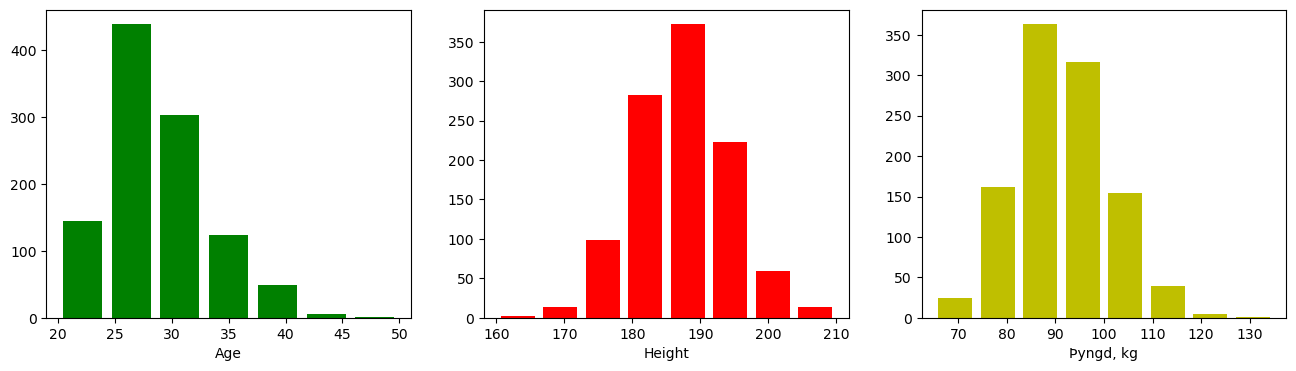

In [2]:
import numpy as np, numpy.linalg as la
import matplotlib.pyplot as plt

(age, height, weight) = np.loadtxt("https://cs.hi.is/python/karfa.txt").T
length = np.arange(len(age))
barWidth = 0.01


plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(age, rwidth=0.8, bins=7, range=(20,50), color='g')
plt.xlabel('Age')

plt.subplot(1,3,2)
plt.hist(height, rwidth=0.8, bins=8, range=(160,210), color='r')
plt.xlabel('Height')

plt.subplot(1,3,3)
plt.hist(weight, rwidth=0.8, bins=8, range=(65,135), color='y') 
plt.xlabel('Þyngd, kg')
plt.show()



## 2.

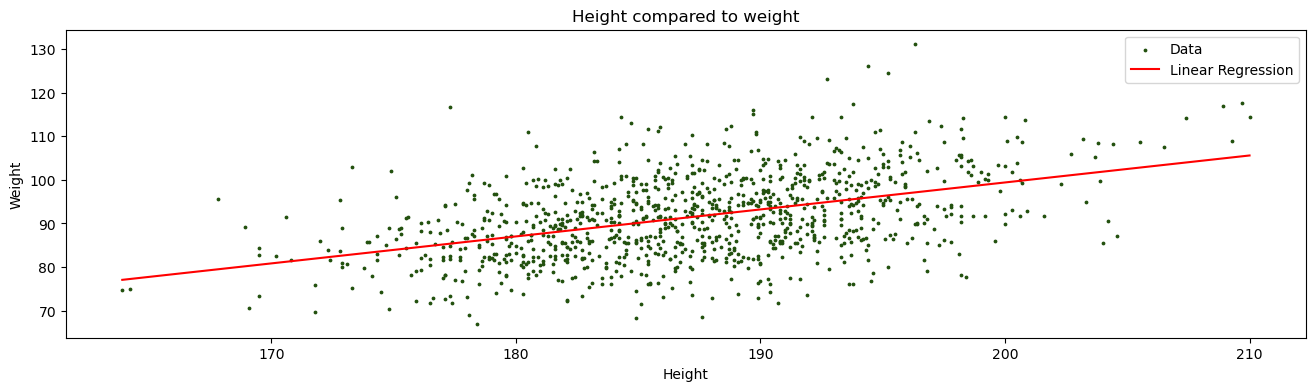

In [3]:
(a, b) = np.polyfit(height, weight, deg=1)
(A,B,C)= np.polyfit(height, weight, deg=2)

xp = np.linspace(min(height), max(height))
yp = a*xp + b
yp1 = A*xp**2+B*xp+C
plt.figure(figsize=(16,4))
plt.scatter(height, weight, c='#23510F', s=3, label="Data")
plt.plot(xp, yp, c='r', label='Linear Regression')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height compared to weight")
plt.legend()
plt.show()

## 3.

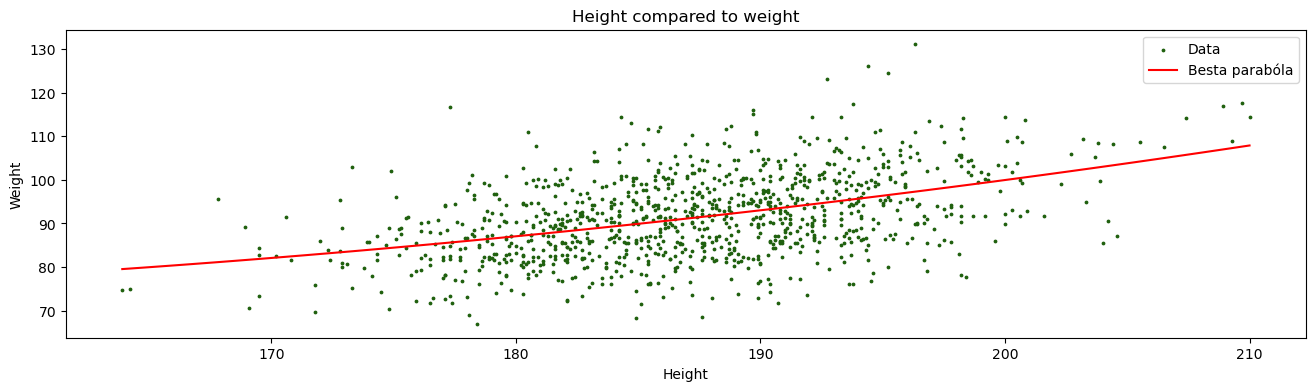

In [4]:
plt.figure(figsize=(16,4))
plt.scatter(height, weight, c='#20610F', s=3, label='Data')
plt.plot(xp, yp1, c='r', label='Besta parabóla')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height compared to weight")
plt.legend()
plt.show()

## 4.

In [5]:
def findmedian(a, b, c):
    eldri = []
    yngri = []
    for i,j in enumerate(a):
        if j <= c:
            yngri.append(b[i])
        if j > c:
            eldri.append(b[i])
    return np.mean(eldri), np.mean(yngri)

a, b = findmedian(age, height, np.median(age))


print("Miðtala er =", round(np.median(age),2))
print("Meðalhæð yngri er =", round(a,2))
print("Meðalhæð eldri er =", round(b,2))



Miðtala er = 27.98
Meðalhæð yngri er = 186.67
Meðalhæð eldri er = 187.74


# 34  Mannfjöldaspá fyrir Ísland

## 1.

In [6]:
A = np.loadtxt("https://cs.hi.is/python/aldursdreifing.txt", skiprows=1, dtype='float', delimiter="\t").T
age = A[0].astype(int)
number = A[1].astype(int)
deathRate = A[2].astype(float)
birthRate = A[3].astype(float)
immigrantsOverEmigrants = A[4].astype(int)

n = deathRate.shape[0]

def Leslie(f,p):
    matrix = np.zeros((n,n))
    matrix[0] = f
    for i in range(n-1):
        matrix[i+1,i] = 1-p[i]
    return(matrix)

fylki = Leslie(birthRate, deathRate)
list4matplot0 = []
print('Ár\tFjöldi')
for i in range(0, 56):
    summa = la.matrix_power(fylki, i) @ number
    list4matplot0.append(summa.sum())
    if i%5==0:
        print(str(i+2020).ljust(7), int(summa.sum()))

Ár	Fjöldi
2020    366517
2025    376516
2030    383912
2035    387681
2040    388190
2045    386031
2050    381831
2055    376259
2060    369496
2065    361280
2070    351467
2075    340356


## 2.

In [7]:
def totalsum(year,amount):
    for i in range(year):
        amount = fylki@amount+immigrantsOverEmigrants
    return amount
totalim = immigrantsOverEmigrants/number.sum()

list4matplot = []

print('Ár\tFjöldi')
for i in range(0, 56):
    summa1 = sum(totalsum(i,number))
    list4matplot.append(summa1)
    if i%5==0:
        print(str(i+2020).ljust(7), int(summa1.sum()))


Ár	Fjöldi
2020    366517
2025    403853
2030    441835
2035    478872
2040    514289
2045    547839
2050    579758
2055    610728
2060    640991
2065    669937
2070    696624
2075    720461


## 3.

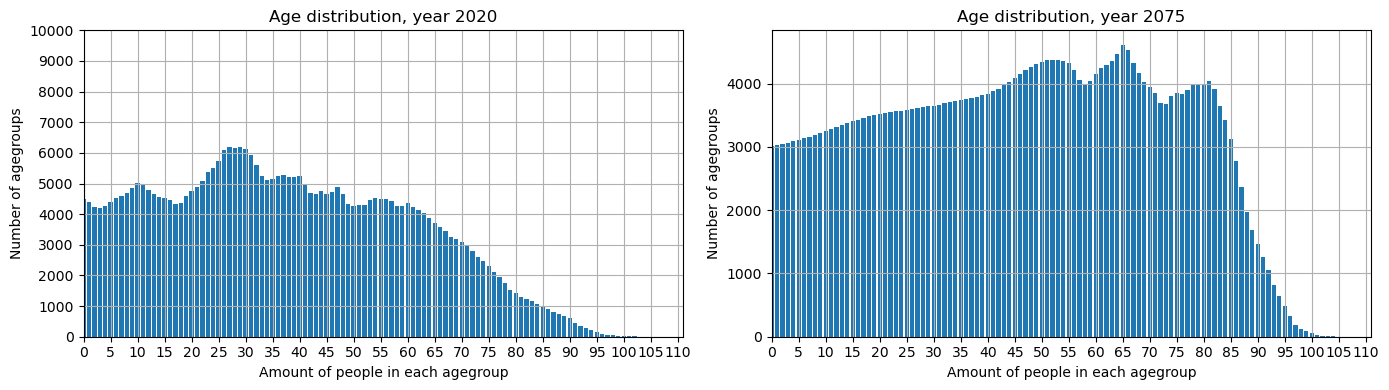

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title('Age distribution, year 2020')
plt.xlabel('Amount of people in each agegroup')
plt.ylabel('Number of agegroups')
plt.xlim(0,111)
plt.ylim(0,10000)
plt.xticks(range(0,111,5))
plt.yticks(range(0,11000,1000))
plt.bar(list(range(111)),number)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Age distribution, year 2075')
plt.xlabel('Amount of people in each agegroup')
plt.ylabel('Number of agegroups')
plt.xlim(0,111)
plt.xticks(range(0,111,5))
plt.yticks(range(0,11000,1000))
plt.bar(list(range(111)),summa)
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.

Ár	Fjöldi
2020    366517
2025    404946
2030    447139
2035    492090
2040    539603
2045    589813
2050    643294
2055    701110
2060    763977
2065    831800
2070    904090
2075    980591


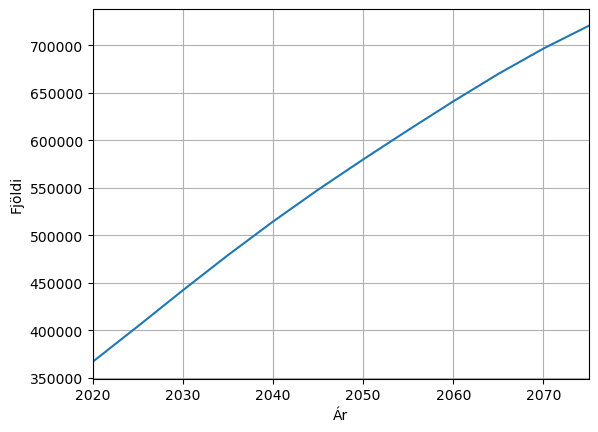

In [13]:
def totalsumm(year, totalamount):
    for i in range(year):
        s = totalim * totalamount.sum()
        totalamount = fylki@totalamount+s
    return totalamount

list4matplot1 = []

print('Ár\tFjöldi')
for i in range(0, 56):
    summa2 = sum(totalsumm(i,(number+totalim)))
    list4matplot1.append(summa2)
    if i%5==0:
        print(str(i+2020).ljust(7), int(summa2.sum()))


year = np.arange(2020, 2076, 5)
x = [sum(totalsum(i,number)) for i in range(0,60,5)]
plt.xlabel('Ár')
plt.ylabel('Fjöldi')
plt.plot(year, x)
plt.xlim(2020,2075)
plt.grid()

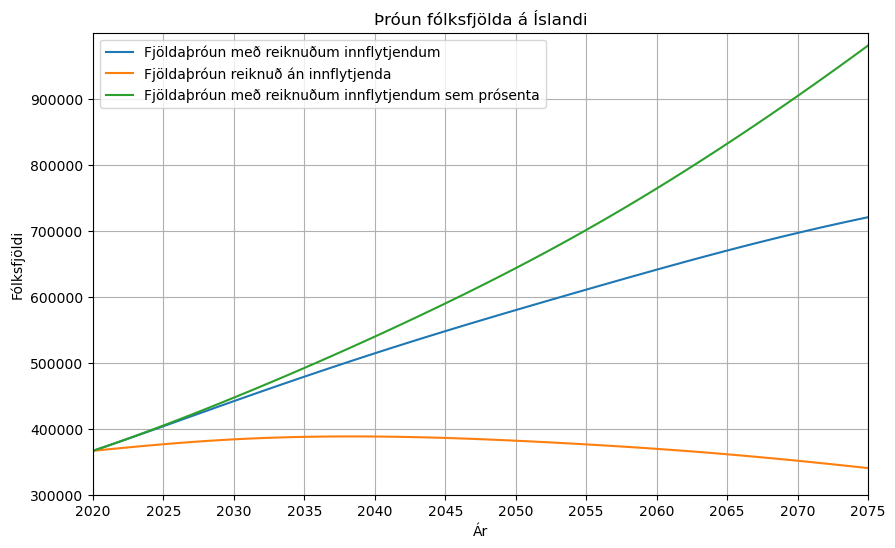

In [15]:
plt.figure(figsize=(10,6))
plt.title('Þróun fólksfjölda á Íslandi')
plt.xlabel('Ár')
plt.ylabel('Fólksfjöldi')
plt.ylim(300000,1000000)
plt.yticks(np.arange(300000,900001, 100000))
plt.xlim(2020,2075)
plt.xticks(np.arange(2020, 2076,5))
plt.plot(list(range(2020,2076)),list4matplot,label='Fjöldaþróun með reiknuðum innflytjendum')
plt.plot(list(range(2020,2076)),list4matplot0,label='Fjöldaþróun reiknuð án innflytjenda')
plt.plot(list(range(2020,2076)),list4matplot1, label='Fjöldaþróun með reiknuðum innflytjendum sem prósenta')
plt.legend()
plt.grid(True)
plt.show()

## 5.

Eins og má sjá á síðustu mynd er mjög mikilvægt fyrir okkur að fá innflytjendur. Ef fólk myndi ekki þora að flytja hingað þá myndi Ísland líklegast enda á frekar slæmum stað. Við værum í góðum málum til 2040 en eftir það væri það bara niðurleið. Dánartíðni er það há miðað við fæðingartíðni að við verðum að fá innflytjendur til þess að halda þessu landi gangandi. Hinsvegar er fjölgun á Íslandi miðað við innflytjendur orðin frekar mikil árið 2075. Einnig er áhugavert að sjá hvernig aldursdreifing er árið 2020 og svo árið 2075. Stærsti hópur árið 2020 er í kringum 30 ára en árið 2075 er stærsti hópurinn í kringum 67 ára. Þetta getur verið slæmt fyrir samfélagið því flestir sem eru 65+ ára eru komin á ellilífeyri. Þetta mun hafa áhrif á yngri kynslóð. 